# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Init" data-toc-modified-id="Init-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Init</a></div><div class="lev1 toc-item"><a href="#Import-data-and-initial--processing" data-toc-modified-id="Import-data-and-initial--processing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import data and initial  processing</a></div><div class="lev1 toc-item"><a href="#Plot-all-raw-data" data-toc-modified-id="Plot-all-raw-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Plot all raw data</a></div><div class="lev1 toc-item"><a href="#Plot-difference-between-finite-and-zero-bias-current-shots" data-toc-modified-id="Plot-difference-between-finite-and-zero-bias-current-shots-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Plot difference between finite and zero bias current shots</a></div><div class="lev1 toc-item"><a href="#Calculate-resistances" data-toc-modified-id="Calculate-resistances-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Calculate resistances</a></div><div class="lev2 toc-item"><a href="#Rising-data" data-toc-modified-id="Rising-data-51"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Rising data</a></div><div class="lev2 toc-item"><a href="#Falling-data" data-toc-modified-id="Falling-data-52"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Falling data</a></div>

# Init

In [1]:
%%capture
import importlib
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
#%matplotlib notebook
%matplotlib inline

import sys
sys.path.insert(0, 'modules')
import pulse_processing as LANL
importlib.reload(LANL)

plt.rcParams['figure.figsize'] = (12,9)
plt.rcParams['axes.linewidth'] = 2 #set the value globally
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['xtick.top'] = 'True'
plt.rcParams['xtick.major.size'] = 6
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['xtick.minor.width'] = 2

plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['ytick.right'] = 'True'
plt.rcParams['ytick.major.size'] = 6
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['ytick.minor.width'] = 2


plt.rcParams['lines.linewidth'] = 2
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize']=20
plt.rcParams.update({'font.family': 'sans-serif'})

Rq = 25813

# Import data and initial  processing

We import a shot with a $10\ \mathrm{\mu A}$ bias current and a shot with no bias current. We will use the zero bias shot to attempt to remove the effects of $\dot{B}$

In [2]:
I = 10E-6 # Current for computing resistance
shotlist = [] # List of all shots for easier plotting
np.seterr(divide='ignore', invalid='ignore')

# List of tuple of variables to important with apporpriate gain
params = [('B',1),('Bdot',1),('I',10*1.05E3),('Vxy',-1),('Vxx',-10),('2T',1)]

sixtyT_pup = LANL.import_shot('example_data/p015_121418.tdms',params)
LANL.rise_fall(sixtyT_pup,params) # Extract rising/falling portion of data
sixtyT_pup['comment'] = 'Vsi = 27 V, Vbg = 8.2 V, Vtg = 0 V'
shotlist.append(sixtyT_pup)

params = [('B',1),('Bdot',1),('I',20*1.05E3),('Vxy',-2),('Vxx',-20),('2T',1)]
sixtyT_zup = LANL.import_shot('example_data/p010_121418.tdms',params)
LANL.rise_fall(sixtyT_zup,params)
sixtyT_zup['comment'] = 'Vsi = 27 V, Vbg = 8.2 V, Vtg = 0 V'
shotlist.append(sixtyT_zup)

LANL.interp_shots(shotlist,params) # Interpolate all shots to same field

# Plot all raw data

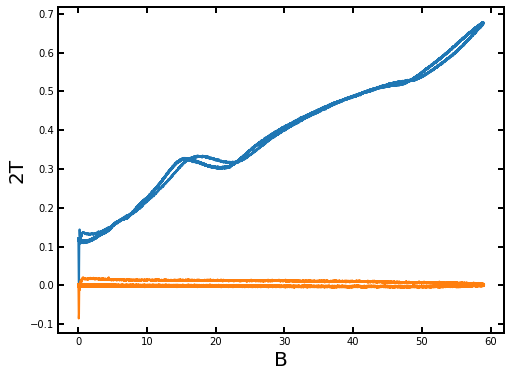

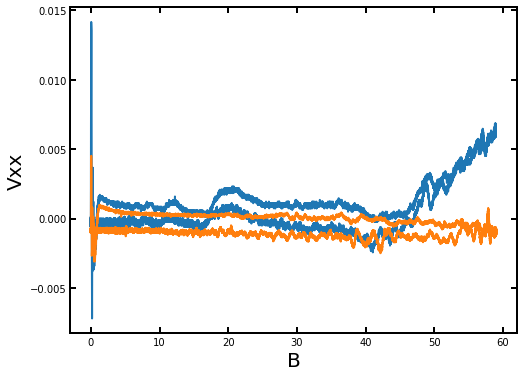

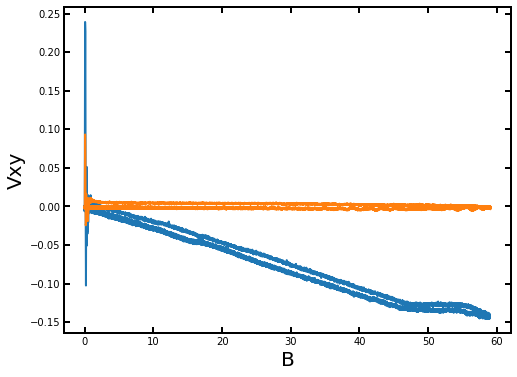

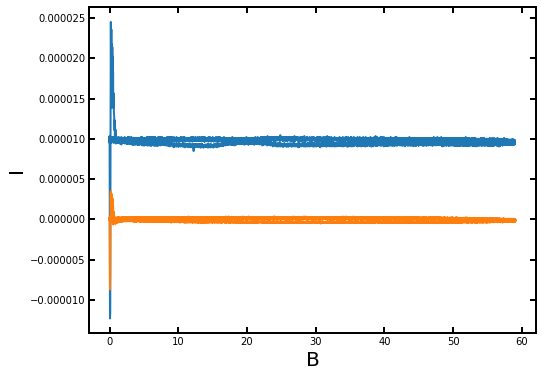

In [3]:
for param in ['2T','Vxx','Vxy','I']:
    plt.figure(figsize = (8,6))
    for shot in shotlist:
        plt.plot(shot['B'],shot[param])
        plt.xlabel('B')
        plt.ylabel(param)

# Plot difference between finite and zero bias current shots

We can see how well we are removing the effects of $\dot{B}$ by see how well the rising and falling portions of the magnet pulse collapse onto one another

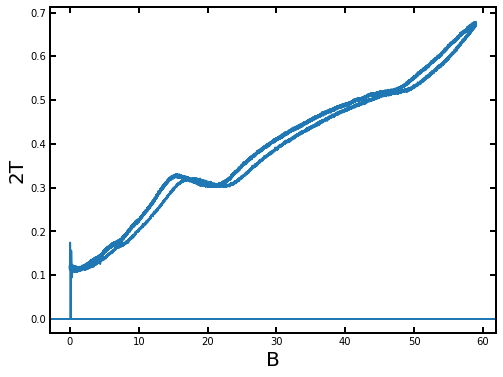

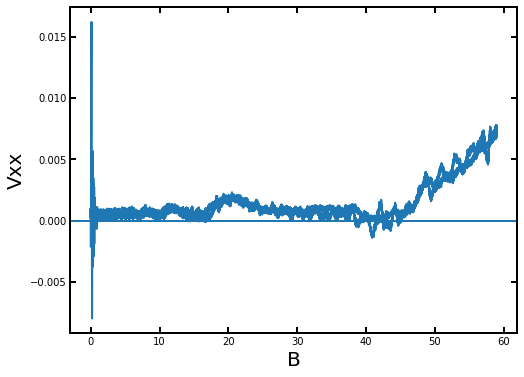

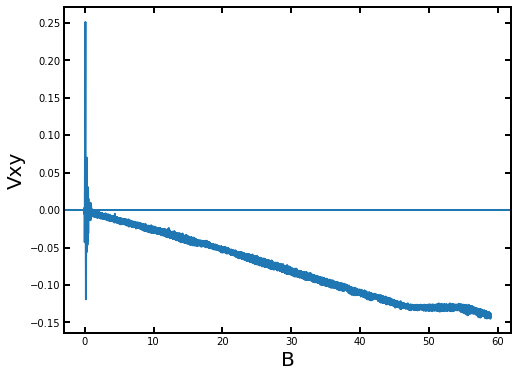

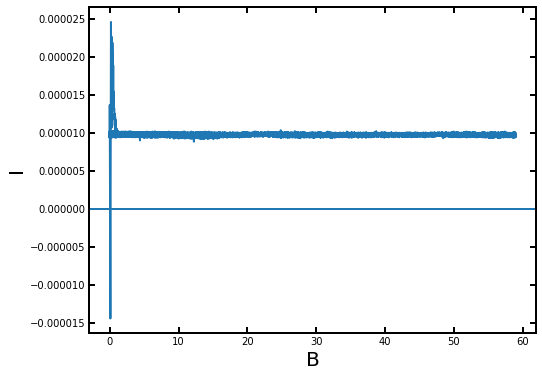

In [4]:
for param in ['2T','Vxx','Vxy','I']:
    plt.figure(figsize = (8,6))
    plt.plot(sixtyT_pup['B'],sixtyT_pup[param]-sixtyT_zup[param])
    plt.xlabel('B')
    plt.ylabel(param)
    plt.axhline(0)

# Calculate resistances

## Rising data

Text(0,0.5,'$R_{xy}\\ (\\mathrm{h/e^2})$')

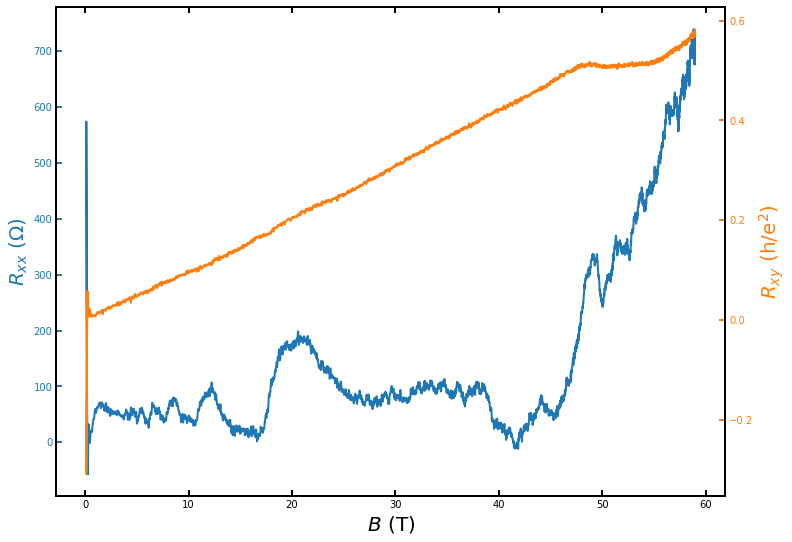

In [5]:
shot = sixtyT_pup.copy()

iterparam = ['Vxx_rising','Vxy_rising']
for param in iterparam:
    shot[param] = (sixtyT_pup[param].copy()-sixtyT_zup[param].copy())

LANL.smooth(shot,['B_rising','Vxx_rising','Vxy_rising'],10)

fig, ax = plt.subplots(figsize = (12,9))
plt.plot(shot['B_rising'],shot['Vxx_rising']/I,color='C0')
ax.tick_params('y',colors='C0')
plt.xlabel(r'$B\ (\mathrm{T})$')
plt.ylabel(r'$R_{xx}\ (\mathrm{\Omega})$',color = 'C0')

ax2 = plt.twinx()
plt.plot(shot['B_rising'],-(shot['Vxy_rising']-1*shot['Vxx_rising'])/Rq/I,color='C1')
ax2.tick_params('y',colors='C1')
plt.ylabel(r'$R_{xy}\ (\mathrm{h/e^2})$',color='C1')

## Falling data

Text(0,0.5,'$R_{xy}\\ (\\mathrm{h/e^2})$')

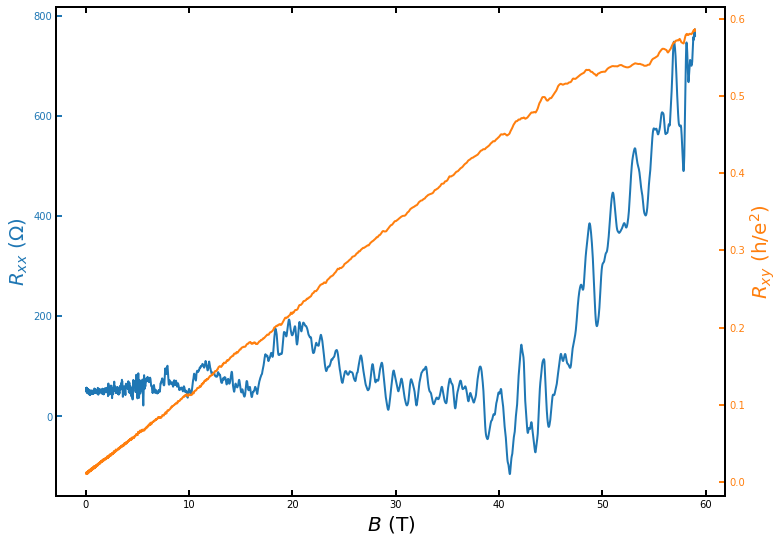

In [6]:
shot = sixtyT_pup.copy()

iterparam = ['Vxx_falling','Vxy_rising']
for param in iterparam:
    shot[param] = (sixtyT_pup[param].copy()-sixtyT_zup[param].copy())

LANL.smooth(shot,['B_falling','Vxx_falling','Vxy_falling'],100)

fig, ax = plt.subplots(figsize = (12,9))
plt.plot(shot['B_falling'],shot['Vxx_falling']/I)
ax.tick_params('y',colors='C0')
plt.xlabel(r'$B\ (\mathrm{T})$')
plt.ylabel(r'$R_{xx}\ (\mathrm{\Omega})$',color = 'C0')

ax2 = plt.twinx()
plt.plot(shot['B_falling'],-(shot['Vxy_falling']-1*shot['Vxx_falling'])/Rq/I,color='C1')
ax2.tick_params('y',colors='C1')
plt.ylabel(r'$R_{xy}\ (\mathrm{h/e^2})$',color='C1')